In [295]:
# common 
import os
import numpy as np
import pandas as pd

# encoder
from sklearn.preprocessing import LabelEncoder

# splitting the data
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.preprocessing import StandardScaler # Standerdizing the data
from imblearn.over_sampling import RandomOverSampler # Oversampling the data

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
init_notebook_mode(connected=True)
cf.go_offline()



# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier




# fine tuning
from sklearn.model_selection import GridSearchCV

# warnings
import warnings
warnings.filterwarnings('ignore')

In [296]:
#import data csv file
df = pd.read_csv("Data\heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [297]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [299]:
df.shape

(299, 13)

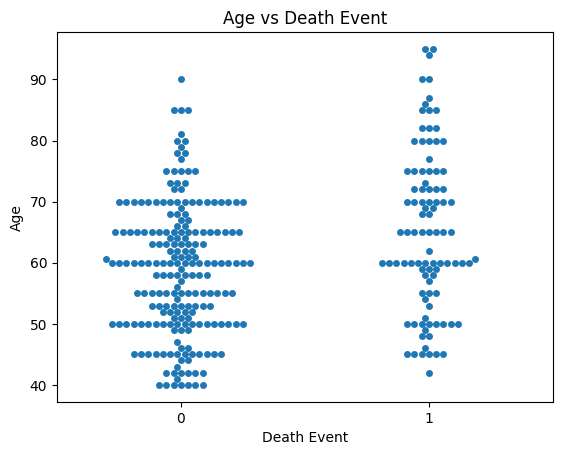

In [300]:
#lets see death event and age with a scatter plot
sns.swarmplot(x='DEATH_EVENT', y='age', data=df)
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.title('Age vs Death Event')
plt.show()



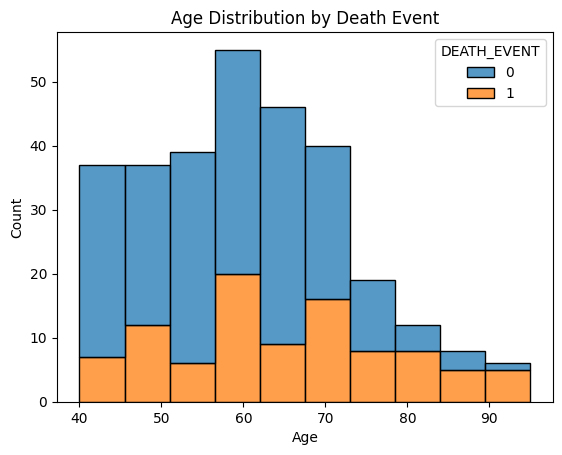

In [301]:
sns.histplot(data=df, x='age', hue='DEATH_EVENT', multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Death Event')
plt.show()

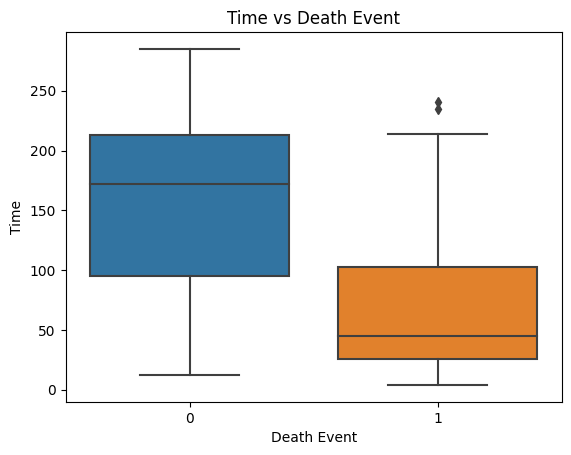

In [302]:
#we can see short-term heart attacks more deadly

sns.boxplot(x='DEATH_EVENT', y='time', data=df)
plt.xlabel('Death Event')
plt.ylabel('Time')
plt.title('Time vs Death Event')
plt.show()


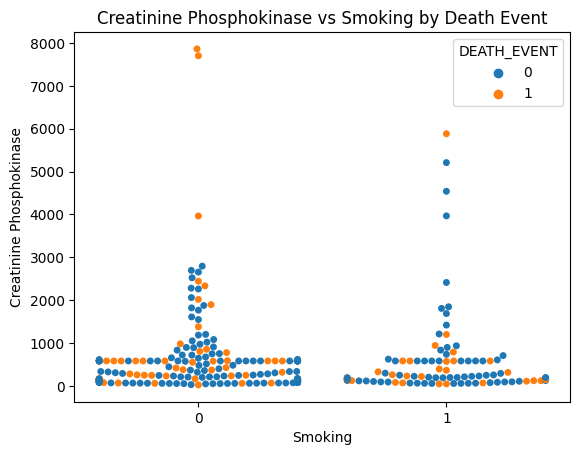

In [303]:
sns.swarmplot(x='smoking', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df)
plt.xlabel('Smoking')
plt.ylabel('Creatinine Phosphokinase')
plt.title('Creatinine Phosphokinase vs Smoking by Death Event')
plt.show()


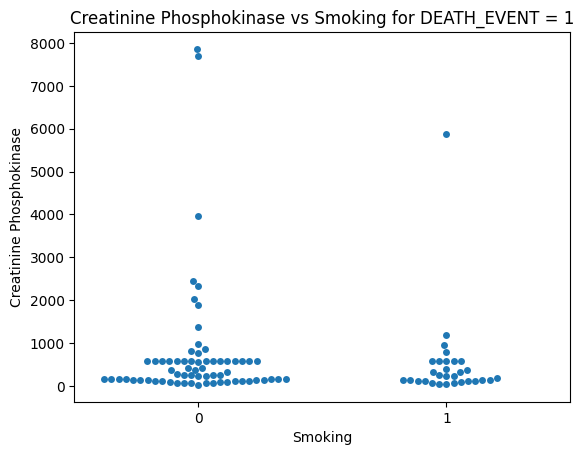

In [304]:
#we can see that smoking is not important a factor in death so we can drop it
df_death_event_1 = df[df['DEATH_EVENT'] == 1]

sns.swarmplot(x='smoking', y='creatinine_phosphokinase', data=df_death_event_1)
plt.xlabel('Smoking')
plt.ylabel('Creatinine Phosphokinase')
plt.title('Creatinine Phosphokinase vs Smoking for DEATH_EVENT = 1')
plt.show()


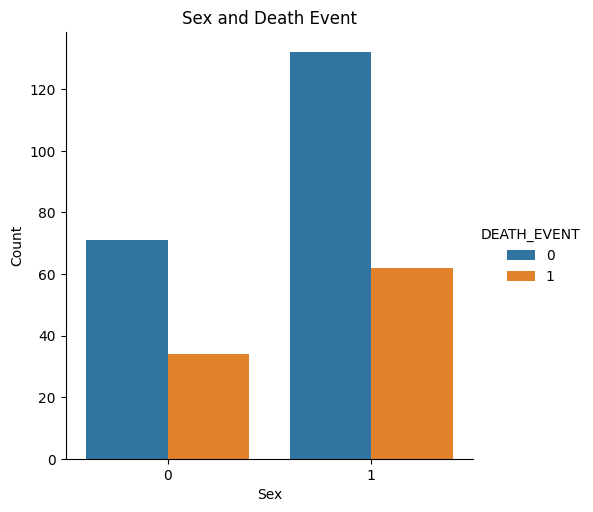

In [305]:
#we can see male more likely to die
sns.catplot(x='sex', hue='DEATH_EVENT', kind='count', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex and Death Event')
plt.show()


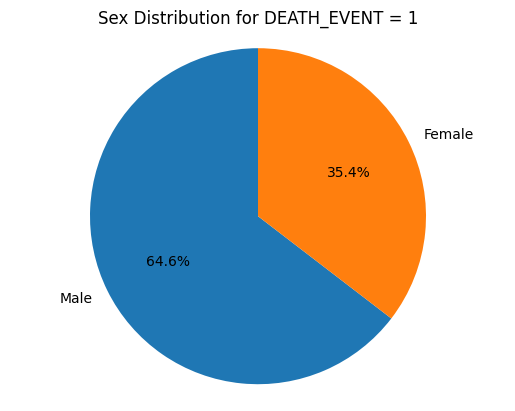

In [306]:
from matplotlib import pyplot as plt


death_counts = df[df['DEATH_EVENT'] == 1]['sex'].value_counts()

plt.pie(death_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sex Distribution for DEATH_EVENT = 1')

plt.show()


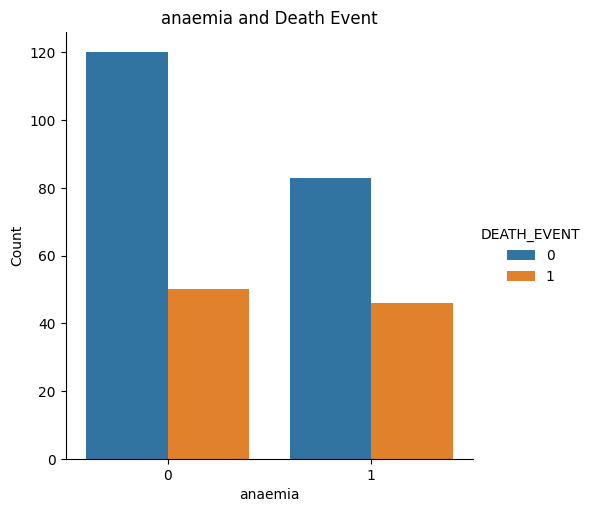

In [307]:
#we can see anemai dont affect death so we can drop this column
sns.catplot(x='anaemia', hue='DEATH_EVENT', kind='count', data=df)
plt.xlabel('anaemia')
plt.ylabel('Count')
plt.title('anaemia and Death Event')
plt.show()


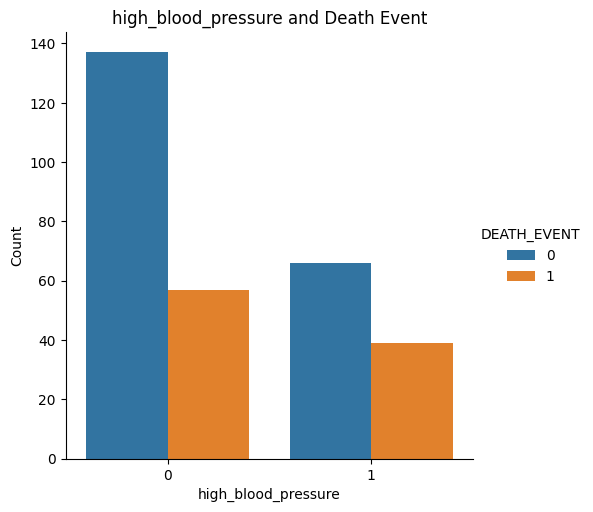

In [308]:
sns.catplot(x='high_blood_pressure', hue='DEATH_EVENT', kind='count', data=df)
plt.xlabel('high_blood_pressure')
plt.ylabel('Count')
plt.title('high_blood_pressure and Death Event')
plt.show()


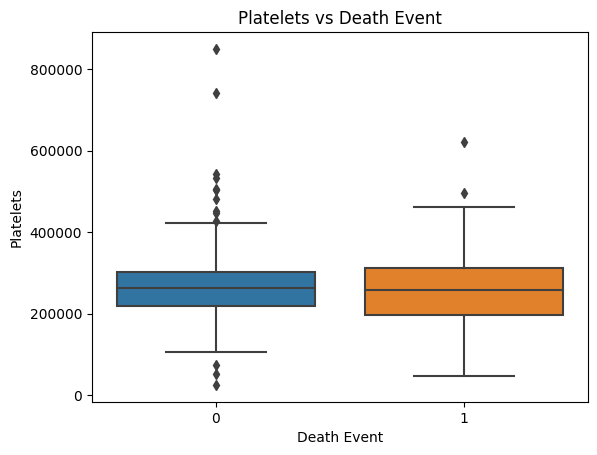

In [309]:
import seaborn as sns

sns.boxplot(x='DEATH_EVENT', y='platelets', data=df)
plt.xlabel('Death Event')
plt.ylabel('Platelets')
plt.title('Platelets vs Death Event')
plt.show()


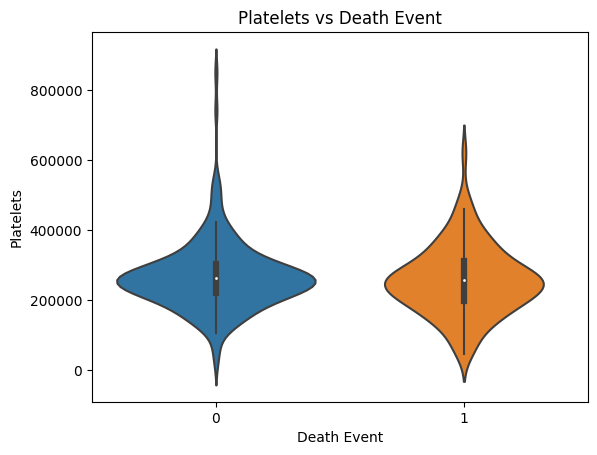

In [310]:
#we can see that platelets dont a big effect on death so we can drop this column

sns.violinplot(x='DEATH_EVENT', y='platelets', data=df)
plt.xlabel('Death Event')
plt.ylabel('Platelets')
plt.title('Platelets vs Death Event')
plt.show()


In [311]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 2:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


In [312]:
fig = make_subplots(
    rows=3, cols=2, subplot_titles=('<b>Distribution Of Anemia<b>','<b>Distribution Of Diabetes<b>','<b>Distribution Of High blood Pressure<b>',
                                   '<b>Distribution Of Sex<b>','<b>Distribution Of Smoking Status<b>', '<b>Distribution Of Death Event<b>'),
    vertical_spacing=0.01,
    specs=[[{"type": "pie"}       ,{"type": "pie"}] ,
           [{"type": "pie"}       ,{"type": "pie"}] ,
           [{"type": "pie"}       ,{"type": "pie"}] ]
           
)
fig.add_trace(
    go.Pie(values=df.anaemia.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],
           hole=0.3,pull=[0,0.08,0.2],marker_colors=['#dcd6f7','#a6b1e1'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=df.diabetes.value_counts().values,labels=['<b>1<b>','<b>0<b>'],
           
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['#393E46', '#a696c8'],textposition='inside'),
    row=1, col=2
)


fig.add_trace(
    go.Pie(values=df.high_blood_pressure.value_counts().values,labels=['<b>1<b>','<b>0<b>'],
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['#dcd6f7', '#424874'],textposition='inside'),
    row=2, col=1
)

fig.add_trace(
    go.Pie(values=df.sex.value_counts().values,labels=['<b>Yes<b>','<b>No<b>'],
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['#a45fbe', '#a6b1e1'],textposition='inside'),
    row=2, col=2
)

fig.add_trace(
    go.Pie(values=df.smoking.value_counts().values,labels=['<b>Private<b>', '<b>Self-employed<b>', '<b>Govt_job<b>', '<b>children<b>', '<b>Never_worked<b>'],
           hole=0.3,pull=[0,0.08,0.08,0.08,0.2],marker_colors=['#77529e',  '#a5bdfd'],textposition='inside'),
    row=3, col=1
    
)
fig.add_trace(
    go.Pie(values=df.DEATH_EVENT.value_counts().values,labels=['<b>Urban<b>', '<b>Rural<b>'],
           hole=0.3,pull=[0,0.08,0.08,0.08,0.2],marker_colors=['#dcb5ff', '#a5bdfd'],textposition='inside'),
    row=3, col=2
) 

 
    
fig.update_layout(
    height=1200,
    showlegend=True,
    title_text="<b>Distribution of Categorical Varibles<b>",
)

fig.show()

In [313]:
df[numerical_features].iplot(kind='histogram', subplots=True,bins=50, colors=['#27296d','#5e63b6','#a393eb','#f5c7f7'],dimensions =(1200,1000))

In [314]:
for i in numerical_features:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='#a393eb', dimensions=(600,600))

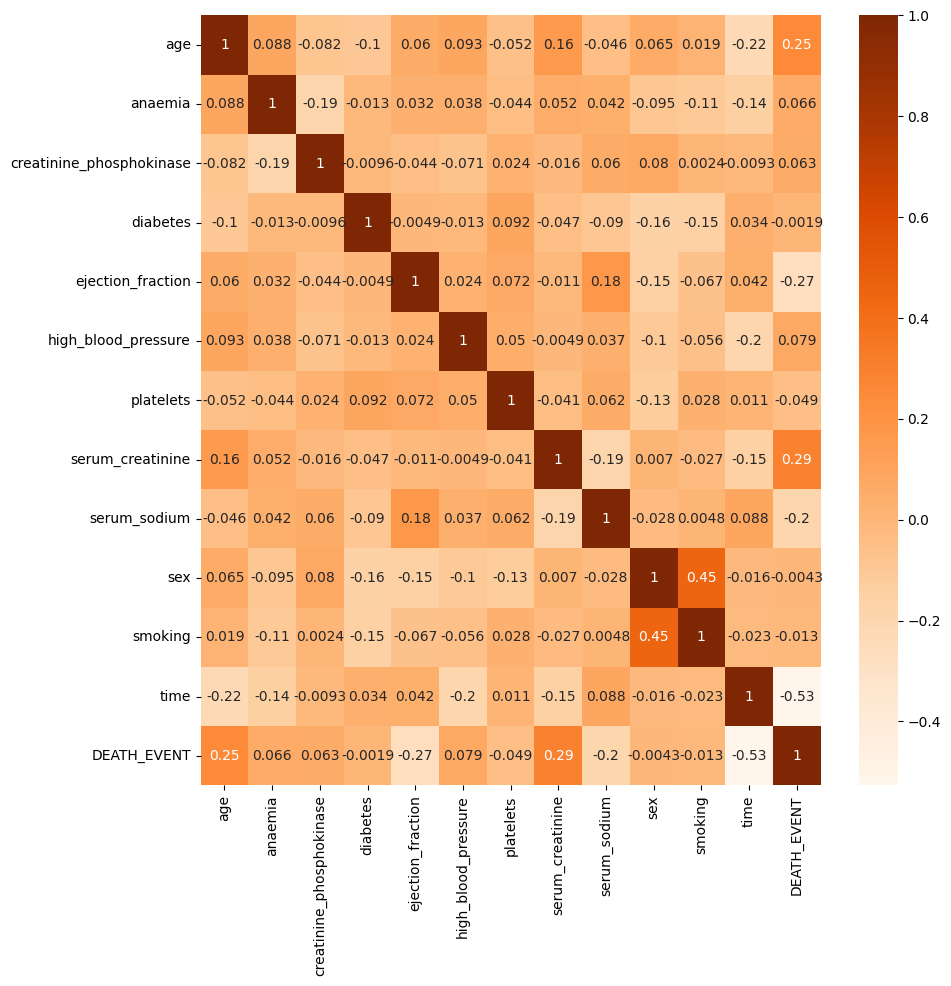

In [315]:
#add heatmap to see correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')
plt.show()


In [316]:
#because they are dont have a big effect on death so we can drop them
df.drop(['anaemia','platelets','smoking'],axis=1,inplace=True)


In [317]:
train , test = np.split(df.sample(frac = 1) , [int(0.8 * len(df))])

In [318]:
def scaler(dataframe , oversampling = False):
    X = dataframe.drop("DEATH_EVENT" , axis = 1)
    Y = dataframe["DEATH_EVENT"]
    
    sc = StandardScaler()
    ros = RandomOverSampler()
    
    if oversampling:
        ros.fit_resample(X , Y)
    
    sc.fit_transform(X)
    
    return X , Y

In [319]:
X_train , Y_train = scaler(train , oversampling = True)
X_test , Y_test = scaler(test)

In [320]:
model_0 = KNeighborsClassifier()
print("KNeighborsClassifier")
model_0.fit(X_train , Y_train)
print(classification_report(Y_test , model_0.predict(X_test)))

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        41
           1       0.83      0.53      0.65        19

    accuracy                           0.82        60
   macro avg       0.82      0.74      0.76        60
weighted avg       0.82      0.82      0.80        60



In [321]:
model_1 = LogisticRegression()
model_1.fit(X_train , Y_train)
print("LogisticRegression")
print(classification_report(Y_test , model_1.predict(X_test)))

LogisticRegression
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        41
           1       1.00      0.63      0.77        19

    accuracy                           0.88        60
   macro avg       0.93      0.82      0.85        60
weighted avg       0.90      0.88      0.87        60



In [322]:
model_2 = GaussianNB()
model_2.fit(X_train , Y_train)
print("GaussianNB")
print(classification_report(Y_test , model_2.predict(X_test)))

GaussianNB
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        41
           1       0.86      0.32      0.46        19

    accuracy                           0.77        60
   macro avg       0.81      0.65      0.66        60
weighted avg       0.79      0.77      0.73        60



In [323]:
model_3 = RandomForestClassifier()
print("RandomForestClassifier")
model_3.fit(X_train , Y_train)
print(classification_report(Y_test , model_3.predict(X_test)))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60

